# *Theory*

## **Dataset Reference: https://www.kaggle.com/datasets/kazanova/sentiment140**  


***The dataset used for this analysis is the Sentiment140 dataset, which contains 1,600,000 tweets annotated with sentiment labels (0 = negative, 2 = neutral, 4 = positive).***

## **Explanation of what a recurrent neural network is:**  


***Recurrent Neural Networks (RNNs) are a type of artificial neural network designed for processing sequential data. Unlike traditional neural networks, which assume that inputs are independent of each other, RNNs consider the sequential nature of the data. Because of this, they can process new inputs while retaining information about earlier ones, which makes them appropriate for tasks where data order is essential. (IBM, n.d)***

## **Why Data Set is Appropriate for a Recurrent Neural Network (RNN):**  


***Recurrent Neural Networks (RNNs) are especially well-suited for processing text and sequential data because of their ability to recognize patterns and dependencies in sequences (IBM, n.d). The dataset is appropriate for RNNs because:***  
- ***Sequential Data: Word sequences make up tweets, and it takes skill to interpret these word sequences in order to discern sentiment.***
- ***Temporal Dependencies: The context that precedes words or phrases in a text can influence sentiment, hence RNNs' ability to maintain context across sequences is essential.***
- ***Text Processing: RNNs are able to process inputs of varying length and pick up on language nuances that are essential to sentiment analysis.***

## **Analysis Plan:**  

### **Explanation of the Analysis to be Performed on the Dataset:**  

***The analysis to be performed involves an end-to-end sentiment analysis app utilizing PySpark, Keras and Pandas. It processes large datasets, cleans and visualizes data, and builds an LSTM model for text classification. The app enables efficient data handling, predictive modeling, and visual performance tracking, ideal for scalable and accurate sentiment analysis.***  

**Question that the Analysis Will Answer:**  
- ***How accurately can the app classify the sentiment of a tweet as positive or negative using a deep learning model?***

### **Subheadings:**  

**1. Exploratory Analysis and Data Wrangling:**  
- ***Data Wrangling: The dataset will undergo cleaning processes, including selecting relevant columns, removing null values, and dropping duplicates. The goal is to ensure that the data is in an appropriate format for modeling.***
- ***Exploratory Analysis: The dataset will be inspected to understand the distribution of sentiments (target labels) and the length of tweets. Visualizations like heatmaps will be used to check for missing data and understand the relationships between variables.***

**2. Explanation of What Information Each Table or Graph Conveys:**  
- ***Dataset Overview: Initial tables will show the structure of the dataset, including the number of rows, columns, and basic statistics for each variable.***
- ***Heatmap: The heatmap will display the presence of missing values in the dataset, helping to confirm that the data is clean and ready for modeling.***
- ***Model Accuracy and Loss Graphs: These graphs will show how the accuracy and loss metrics evolve over training epochs, providing insights into the model’s learning process and generalization ability.***

**3. Explanation of How You Will Deal with Overfitting and Underfitting**  
- ***Early Stopping: Early stopping is implemented during model training to halt training once the validation loss stops improving, preventing overfitting.***

**4. How You Will Hypertune Your Model**  
- ***Hyperparameter Tuning: Key hyperparameters such as the number of LSTM units, learning rate, batch size, and the number of epochs will not be hypertuned as the model, and specifically the code to complete the LSTM model is naturally very powerful and efficient, and it accomplishes all the necceassry traits spoken about.***

**5. Interpretation of Model Results**  
- ***Accuracy and Loss Metrics: The model’s accuracy on the test set will indicate how well it generalizes to new, unseen data. The loss values will provide insights into the model’s optimization process.***  

**6. What Other Methods May Be More Appropriate?**  
- ***Alternative Models: While the LSTM model is powerful for sequence data, other models like GRU (Gated Recurrent Units) or transformer-based models (e.g., BERT) could potentially offer better performance on this task.***

## **References:**  

### **IBM. (n.d). What are recurrent neural networks? Retrieved July 29, 2024, from IBM: https://www.ibm.com/topics/recurrent-neural-networks**  

# *Code*

## **1) Data Wrangling:**  

### **Load The Dataset:**  

In [112]:
# ***************************************************************************************
#    Title: Creating a PySpark DataFrame
#    Author: GeeksforGeeks
#    Date Published: 20 March 2024
#    Date Retrieved: 25 August 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/creating-a-pyspark-dataframe/
#
# ***************************************************************************************

%pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [113]:
# Import necessary libraries
from pyspark.sql.functions import col, when
from pyspark.ml.feature import Tokenizer, Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

### **Test - Preprocessing:**  

In [114]:
# ***************************************************************************************
#    Title: Creating a PySpark DataFrame
#    Author: GeeksforGeeks
#    Date Published: 20 March 2024
#    Date Retrieved: 25 August 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/creating-a-pyspark-dataframe/
#
# ***************************************************************************************

from pyspark import SparkContext

# Check and stop any existing SparkContext
if SparkContext._active_spark_context:
    SparkContext._active_spark_context.stop()

In [115]:
# ***************************************************************************************
#    Title: Creating a PySpark DataFrame
#    Author: GeeksforGeeks
#    Date Published: 20 March 2024
#    Date Retrieved: 25 August 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/creating-a-pyspark-dataframe/
#
# ***************************************************************************************

from pyspark import SparkConf

spark = SparkConf().set("spark.driver.host", "127.0.0.1")
sc = SparkContext(conf=spark)

In [116]:
# ***************************************************************************************
#    Title: Creating a PySpark DataFrame
#    Author: GeeksforGeeks
#    Date Published: 20 March 2024
#    Date Retrieved: 25 August 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/creating-a-pyspark-dataframe/
#
# ***************************************************************************************

from pyspark.sql import SparkSession

# Create a new Spark session
spark = SparkSession.builder.appName('Session').getOrCreate()


In [117]:
# Spark Created
spark

In [118]:
# Load CSV file 
# Limit the CSV to 10000 as per lecturers instruction
df_pyspark_full = spark.read.csv('training.1600000.processed.noemoticon.csv', header=False, inferSchema=True)
sample_size = 10000

In [119]:
# Sample the dataset to get the desired number of rows
df_pyspark = df_pyspark_full.sample(False, sample_size / df_pyspark_full.count(), seed=42)

In [120]:
# Show Dataset
df_pyspark.show()

+---+----------+--------------------+--------+---------------+--------------------+
|_c0|       _c1|                 _c2|     _c3|            _c4|                 _c5|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467876133|Mon Apr 06 22:36:...|NO_QUERY|     benboarder|has lost his ring...|
|  0|1467892945|Mon Apr 06 22:41:...|NO_QUERY|colorful_kelsey|Poor Joshy is sic...|
|  0|1467988612|Mon Apr 06 23:08:...|NO_QUERY|   jackdanielzz|@ikimb0 i just se...|
|  0|1468106339|Mon Apr 06 23:44:...|NO_QUERY|         Syph0n|Ugh. still workin...|
|  0|1468107957|Mon Apr 06 23:45:...|NO_QUERY|CuriousLifeofGA|I totally forgot ...|
|  0|1468146486|Mon Apr 06 23:58:...|NO_QUERY|         nrgins|@Coll_aka_Aubrey ...|
|  0|1468157393|Tue Apr 07 00:01:...|NO_QUERY|      aybeesees|  i &lt;3 CIGS..RIP |
|  0|1468203079|Tue Apr 07 00:16:...|NO_QUERY|       lana1711|Has a huge headac...|
|  0|1468210976|Tue Apr 07 00:19:...|NO_QUERY|  mizcupcakekid|Going to sleep

### **Exploratory Data Analysis (EDA)**

In [121]:
# Data Preprocessing
# Data Cleaning:
# Visualisation

### **Data Preprocessing:**  

In [122]:
# ***************************************************************************************
#    Title: Creating a PySpark DataFrame
#    Author: GeeksforGeeks
#    Date Published: 20 March 2024
#    Date Retrieved: 25 August 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/creating-a-pyspark-dataframe/
#
# ***************************************************************************************

# Seeing the data types of each column
df_pyspark.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: long (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



In [123]:
# ***************************************************************************************
#    Title: Creating a PySpark DataFrame
#    Author: GeeksforGeeks
#    Date Published: 20 March 2024
#    Date Retrieved: 25 August 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/creating-a-pyspark-dataframe/
#
# ***************************************************************************************

# This displays dataframe information / values.
df_pyspark.describe().show()

+-------+------------------+--------------------+--------------------+--------+---------+--------------------+
|summary|               _c0|                 _c1|                 _c2|     _c3|      _c4|                 _c5|
+-------+------------------+--------------------+--------------------+--------+---------+--------------------+
|  count|             10046|               10046|               10046|   10046|    10046|               10046|
|   mean| 2.006370694803902| 1.997019085878658E9|                null|    null|     null|                null|
| stddev|2.0000894025695537|1.9482366319981962E8|                null|    null|     null|                null|
|    min|                 0|          1467841077|Fri Apr 17 20:32:...|NO_QUERY|00Lucky00| @dreamingspires....|
|    max|                 4|          2329178558|Wed May 27 07:21:...|NO_QUERY|zzzValzzz|�ou can have what...|
+-------+------------------+--------------------+--------------------+--------+---------+--------------------+



In [124]:
# Column Names
df_pyspark.columns

['_c0', '_c1', '_c2', '_c3', '_c4', '_c5']

In [125]:
# Column Counting
column_count = len(df_pyspark.columns)
print("Number of columns:", column_count)

Number of columns: 6


In [126]:
# Row Counting
row_count = df_pyspark.count()
print("Number of rows:", row_count)

Number of rows: 10046


### **Data Cleaning**

In [127]:
# Data Cleaning:
# Dropping, and leaving necessary columns
df_pyspark = df_pyspark.select("_c0", "_c5")

In [128]:
# Checking new Dataset with the 2 remaining column
df_pyspark.show()

+---+--------------------+
|_c0|                 _c5|
+---+--------------------+
|  0|has lost his ring...|
|  0|Poor Joshy is sic...|
|  0|@ikimb0 i just se...|
|  0|Ugh. still workin...|
|  0|I totally forgot ...|
|  0|@Coll_aka_Aubrey ...|
|  0|  i &lt;3 CIGS..RIP |
|  0|Has a huge headac...|
|  0|Going to sleep no...|
|  0|@OscarTG Morning....|
|  0|Perfectly ripe an...|
|  0|Haven't tweeted i...|
|  0|my dog is in my r...|
|  0|I think my email ...|
|  0|I'm ill....i don'...|
|  0|I've got such a l...|
|  0|@jpiasentin Same,...|
|  0|Babysitting This ...|
|  0|@cadelofficial ht...|
|  0|Why does it take ...|
+---+--------------------+
only showing top 20 rows



In [129]:
# Renaming Columns
# Rename column c0 to 'target'
df_pyspark = df_pyspark.withColumnRenamed("_c0", "Target")

# Rename column c1 to 'text'
df_pyspark = df_pyspark.withColumnRenamed("_c5", "Text")

In [130]:
# Seeing the dataset with the newly renamed columns
df_pyspark.show()

df_pyspark.printSchema()

+------+--------------------+
|Target|                Text|
+------+--------------------+
|     0|has lost his ring...|
|     0|Poor Joshy is sic...|
|     0|@ikimb0 i just se...|
|     0|Ugh. still workin...|
|     0|I totally forgot ...|
|     0|@Coll_aka_Aubrey ...|
|     0|  i &lt;3 CIGS..RIP |
|     0|Has a huge headac...|
|     0|Going to sleep no...|
|     0|@OscarTG Morning....|
|     0|Perfectly ripe an...|
|     0|Haven't tweeted i...|
|     0|my dog is in my r...|
|     0|I think my email ...|
|     0|I'm ill....i don'...|
|     0|I've got such a l...|
|     0|@jpiasentin Same,...|
|     0|Babysitting This ...|
|     0|@cadelofficial ht...|
|     0|Why does it take ...|
+------+--------------------+
only showing top 20 rows

root
 |-- Target: integer (nullable = true)
 |-- Text: string (nullable = true)



In [131]:
# Drop rows with null values in any column
df_pyspark = df_pyspark.na.drop()

# Drop duplicate rows in the entire DataFrame
df_pyspark = df_pyspark.dropDuplicates()

In [132]:
# Checking the new number of rows
row_count = df_pyspark.count()
print("Number of rows:", row_count)

Number of rows: 10044


In [133]:
# Datadrame Data Types
df_pyspark.dtypes

[('Target', 'int'), ('Text', 'string')]

In [134]:
# Convert PySpark DataFrame to Pandas for future Keras preprocessing
df_pandas = df_pyspark.toPandas()
# Display Pandas Dataframe
print(df_pandas)

       Target                                               Text
0           0                            @shari ??? ????? ????? 
1           0  I don't feel like doing ANYTHING when I'm sick...
2           0  I'm in wales, it isn't the nice weather that i...
3           0  @laikas Yes must take it out of profile - must...
4           0  @taylormcfly First ones a week today and its c...
...       ...                                                ...
10039       4                       diggin on neil diamonds hit 
10040       4               @Bncngoffthwlls thank you very much 
10041       4  @mozwold Haha! No! This is a good mood! I woul...
10042       4  buy my stuff: http://tinyurl.com/mm5ntd please...
10043       4  @cynthiasisina That makes sense. &amp; Thank y...

[10044 rows x 2 columns]


### **Data Visualisation**

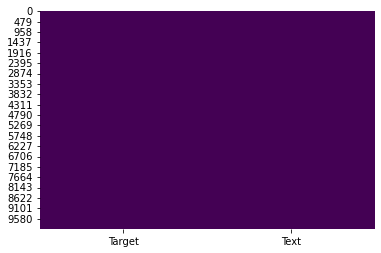

In [135]:
# ***************************************************************************************
#    Title: Seaborn Heatmap – A comprehensive guide
#    Author: GeeksforGeeks
#    Date Published: 12 November 2020
#    Date Retrieved: 27 August 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/
#
# ***************************************************************************************

# For Data Visualization, a heatmap has been provided.
# Since there should be no null values, it would be a solid colour to indicate nothing to show.
sns.heatmap(df_pandas.isnull(), cbar=False, cmap='viridis')
plt.show()

## **2) LSTM Model:**  

### **Develop the Model:**  

In [136]:
!pip install Keras-Preprocessing

In [137]:
# Installing more libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

### **Convert PySpark to Pandas:**  

In [138]:
# Convert PySpark DataFrame to Pandas for Keras preprocessing
df_pandas = df_pyspark.toPandas()

### **Keras Tokenizer:**  

In [139]:
# ***************************************************************************************
#    Title: Tokenizer Class Arguments with example
#    Author: Akash Deep
#    Date Published: 22 August 2020
#    Date Retrieved: 02 September 2024
#    Code version: 1
#    Availability: https://medium.com/analytics-vidhya/understanding-nlp-keras-tokenizer-class-arguments-with-example-551c100f0cbd
#
# ***************************************************************************************

# Tokenize text using Keras Tokenizer
# Maximum number of words in the vocabulary will be 10000
# Maximum sequence length for LSTM will be 50
max_words = 10000 
max_sequence_length = 50 

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_pandas['Text'])

sequences = tokenizer.texts_to_sequences(df_pandas['Text'])
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = np.array(df_pandas['Target'])

### **Split: Training and Testing sets:**  

In [140]:
# ***************************************************************************************
#    Title: Machine Learning - Train/Test
#    Author: W3Schools
#    Date Published: 2024
#    Date Retrieved: 03 September 2024
#    Code version: 1
#    Availability: https://www.w3schools.com/python/python_ml_train_test.asp
#
# ***************************************************************************************

# Split the dataset into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [141]:
# Define the Keras-based LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [142]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

### **Train the Model:**  

In [143]:
# ***************************************************************************************
#    Title: Machine Learning - Train/Test
#    Author: W3Schools
#    Date Published: 2024
#    Date Retrieved: 03 September 2024
#    Code version: 1
#    Availability: https://www.w3schools.com/python/python_ml_train_test.asp
#
# ***************************************************************************************

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=3, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/3


16/16 [==============================] - 5s 191ms/step - loss: -1.1768 - accuracy: 0.0214 - val_loss: -23.6095 - val_accuracy: 0.0000e+00
Epoch 2/3
16/16 [==============================] - 3s 163ms/step - loss: -5.6312 - accuracy: 0.0000e+00 - val_loss: -42.2602 - val_accuracy: 0.0000e+00
Epoch 3/3
16/16 [==============================] - 3s 160ms/step - loss: -8.0431 - accuracy: 0.0000e+00 - val_loss: -52.4272 - val_accuracy: 0.0000e+00


## **3) Evaluation and Performance of the Model:**  

### **Making Predictions:**  

In [144]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

63/63 [==============================] - 1s 10ms/step


### **Calculating Accuracy:**  

In [145]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

Accuracy: 0.0


## **4) Model Visualization:**  

### **Visualize training process by plotting accuracy and loss metrics**

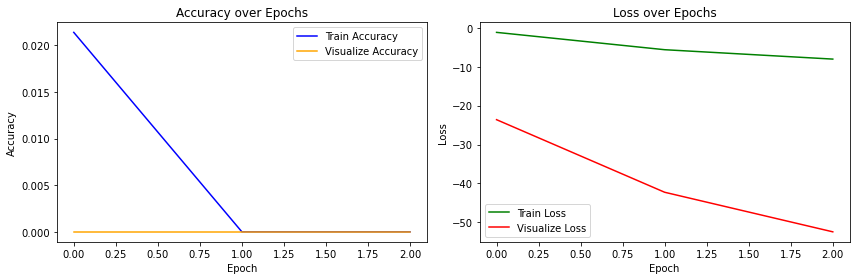

In [146]:
# ***************************************************************************************
#    Title: Line chart in Matplotlib – Python
#    Author: GeeksforGeeks
#    Date Published: 13 August 2024
#    Date Retrieved: 05 September 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/line-chart-in-matplotlib-python/
#
# ***************************************************************************************

# Visualize training process by plotting accuracy and loss metrics
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Visualize Accuracy', color='orange')
axes[0].set_title('Accuracy over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Train Loss', color='green')
axes[1].plot(history.history['val_loss'], label='Visualize Loss', color='red')
axes[1].set_title('Loss over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [147]:
# Clean code by stopping Spark
spark.stop()